# Spatial and Timeseries visualisation

In [1]:
%matplotlib inline

In [2]:
import awrams.visualisation.vis as vis
import awrams.visualisation.results as res
from awrams.utils.catchments import CatchmentDB,CATCHMENT_SHAPEFILE
catchments = CatchmentDB()
CATCHMENT_SHAPEFILE

'/home/sbaronha/myGIT/cm/awral/Package/utils/awrams/utils/data/Final_list_all_attributes.shp'

## load results
expects to find netcdf files in folder

In [3]:
results = res.load_results('/data/cwd_awra_data/awra_test_outputs/Scheduled_v5_awrapreprod/')
# results = res.load_results('/data/cwd_awra_data/awra_test_outputs/Scheduled_v5_sdcvt-awrap01//')

In [4]:
results.path

'/data/cwd_awra_data/awra_test_outputs/Scheduled_v5_awrapreprod'

### variables present in results
tab completable access to variable list

In [5]:
#results.variables.<tab>

In [6]:
results.variables

OrderedDict([('e0_avg', e0_avg), ('etot_avg', etot_avg), ('sd_avg', sd_avg), ('ss_avg', ss_avg), ('qtot_avg', qtot_avg), ('s0_avg', s0_avg), ('dd_avg', dd_avg)])

# display a spatial slice
#### define slice of interest for viewing = [variables, period, extent]<br>
variables slice
* display a single variable - results.variables.qtot_avg
* display multiple variables with a tuple - results.variables.qtot_avg,results.variables.ss_avg
* display all variables using standard slicing syntax - ":"

period slice
* a single day - "1 jul 2010"
* a period - "jul 2010" or "jul 2010 - jun 2011"
* data will be aggregated over the period using the specified method (pass aggregate_method='average' or aggregate_method='sum')<br>or the default method for a variable

extent slice
* entire spatial extents - ":" or vis.extents.ExtentAll()
* a bounding box - vis.extents.GeoBounds(lat0,lon0,lat1,lon1) eg vis.extents.GeoBounds(-40,145,-44,149)
* a catchment - catchments.by_name.Murrumbidgee_MittagangCrossing()

### a single day, whole extents

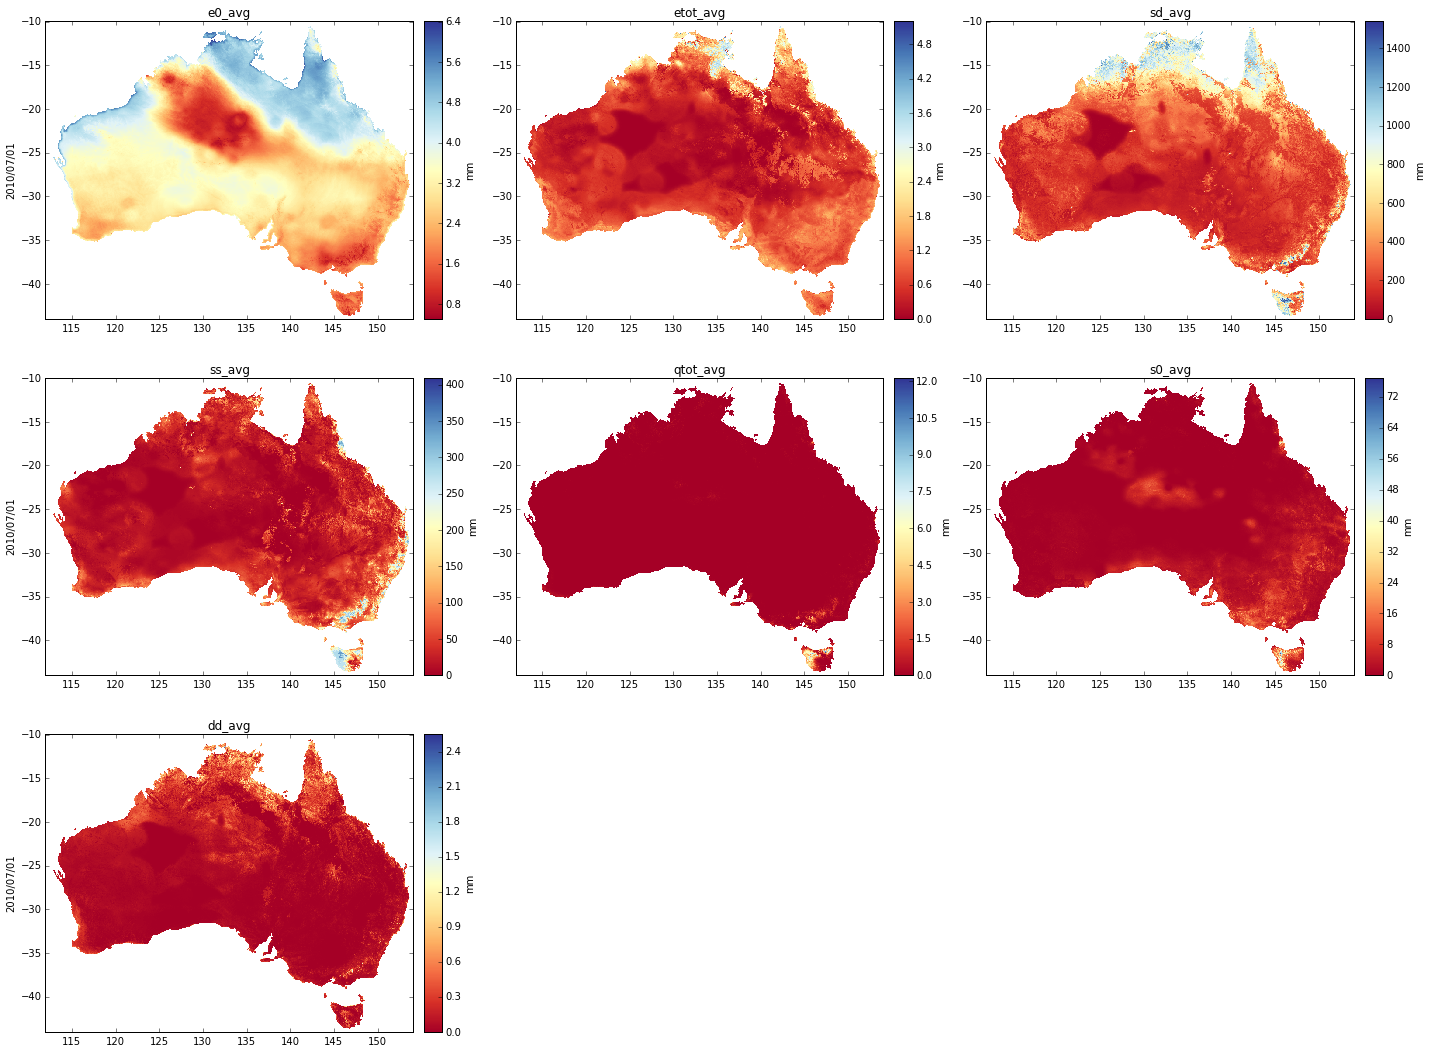

In [7]:
results[:,'1 jul 2010',:].spatial()

### aggregated over a month for specified region
#### and save picture to png

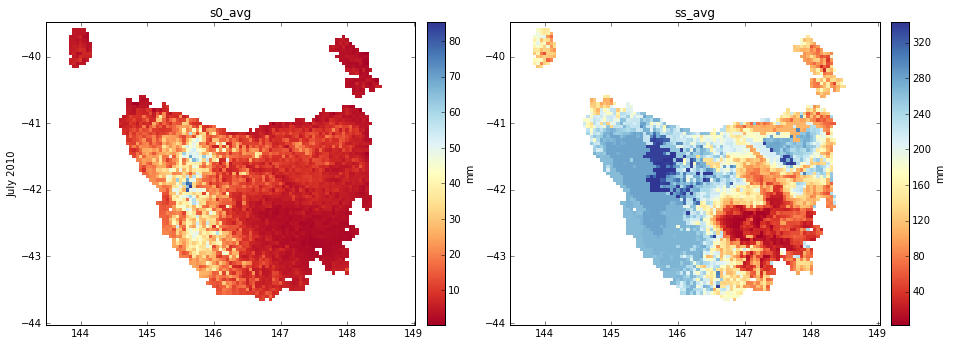

In [12]:
v = results.variables.s0_avg,results.variables.ss_avg
results[v,'jul 2010',vis.extents.from_boundary_coords(-39.5,143.5,-44,149)].spatial()
vis.plt.savefig('map_of_tasmania.png', format='png', dpi=120)

#### change aggregation method from default of mean to sum

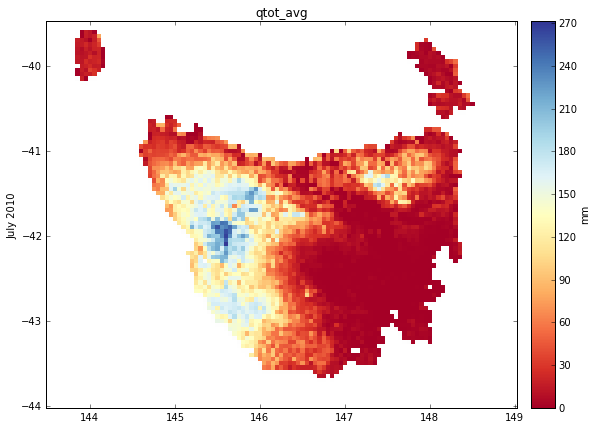

In [9]:
v = results.variables.qtot_avg
v.agg_method = 'sum'
results[v,'jul 2010',vis.extents.from_boundary_coords(-39.5,143.5,-44,149)].spatial()

### accessing the underlying data
raw data cube

In [10]:
results.variables.s0_avg.data.shape

(31, 91, 111)

temporally aggregated data

In [11]:
results.variables.s0_avg.agg_data.shape

(91, 111)

### aggregated over a catchment
by default catchments are read from  shapefile *"awrams/utils/data/Final_list_all_attributes.shp"*<br>
with features in the shapefile referenced by *key_field: 'StationID'*<br>
and features named with *name_fields: ['GaugeName', 'RiverName']*<br>
<br>
to supply a different shapefile call:

    catchments = CatchmentDB(shp_file="shape_file_name")
        
to specify different feature field names for key_field and name_fields, before calling CatchmentDB set:

    CatchmentDB.key_field = "new_id_field"
    CatchmentDB.name_fields = ["new_name_field_1","new_name_field_2,...]
    CatchmentDB.name_format = "%s (%s)" ### number of format specifiers = number of name_fields

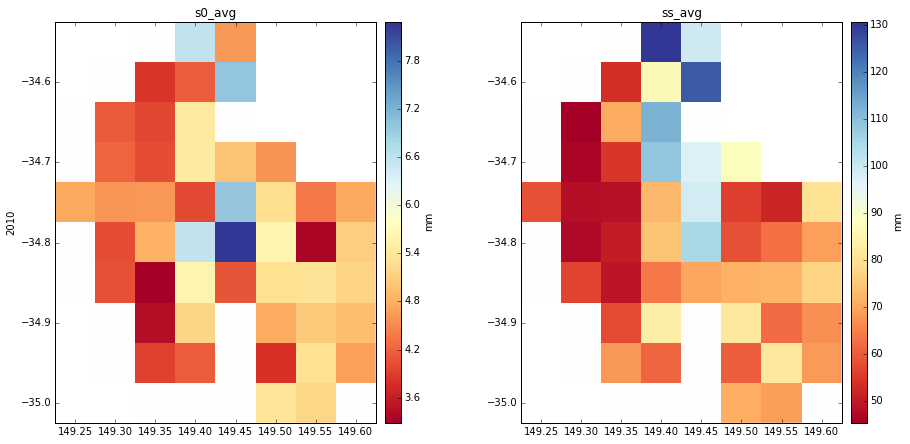

In [12]:
v = results.variables.s0_avg,results.variables.ss_avg
results[v,'2010',catchments.by_name.Lachlan_Gunning()].spatial(interpolation=None) #interpolation="bilinear")

#### show location of catchment

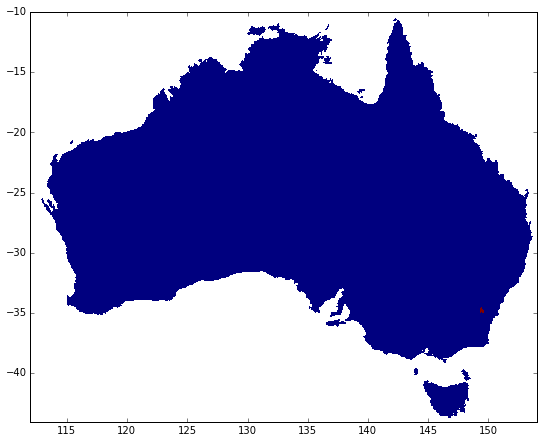

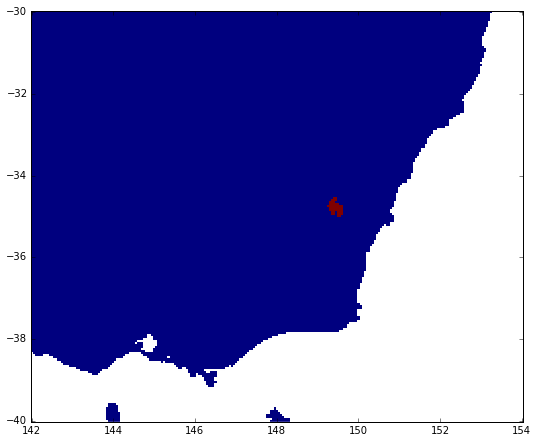

In [13]:
vis.show_extent(catchments.by_name.Lachlan_Gunning())
vis.show_extent(catchments.by_name.Lachlan_Gunning(),vis.extents.from_boundary_coords(-40,142,-30,154))

#### list of catchments in default shapefile *"awrams/utils/data/Final_list_all_attributes.shp"*

In [14]:
catchments.list()

{3303: 'Blackall (Barcoo)',
 4502: 'Terrapinna Springs (Hamilton Ck)',
 4508: 'Wertaloona (Mt McKinlay Ck)',
 5115: 'South Rd Crossing (Hugh)',
 6005: 'Trephina Gorge (Trephina Ck)',
 11203: 'Quilpie (Bulloo)',
 102101: 'Fall Ck (Pascoe)',
 104001: 'Telegraph Rd (Stewart)',
 105001: 'Sandy Ck (Hann)',
 105105: 'Developmental Rd (East Normanby)',
 107001: 'Flaggy (Endeavour)',
 107002: 'Mount Simon (Annan)',
 107003: 'Beesbike (Annan)',
 108002: 'Bairds (Daintree)',
 108003: 'China Camp (Bloomfield)',
 109001: 'Mossman (Mossman)',
 110011: 'Flaggy Ck TM (Flaggy Ck)',
 111005: 'The Fisheries (Mulgrave)',
 111007: 'Peets Br (Mulgrave)',
 111101: 'Bucklands (Russell)',
 112101: 'U/S Central Mill (South Johnstone)',
 112102: 'Upper Japoonvale (Liverpool Ck)',
 113004: 'Powerline (Cochable Ck)',
 114001: 'Upper Murray (Murray)',
 116006: 'Abergowrie (Herbert)',
 116008: 'Abergowrie (Gowrie Ck)',
 116010: 'Blencoe Falls (Blencoe Ck)',
 116012: '8.7KM (Cameron Ck)',
 116013: 'Archer Ck (Millst

### manipulating matplotlib settings

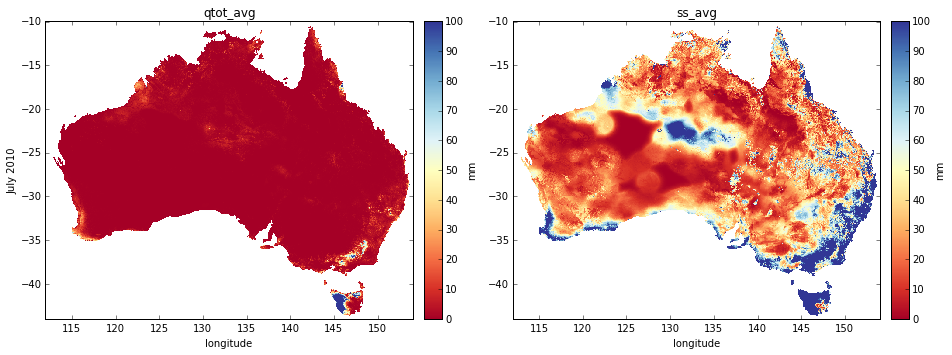

In [15]:
v = results.variables.qtot_avg,results.variables.ss_avg
results[v,'jul 2010',:].spatial(clim=(0,100),xlabel="longitude")

#### accessing the underlying axes
get the range of data for the selection

In [16]:
q = results[v,'jul 2010',vis.extents.from_boundary_coords(-39.5,143.5,-44,149)]
q.get_data_limits()

(0.0, 344.0)

set colour range limits and horizontal axis labels

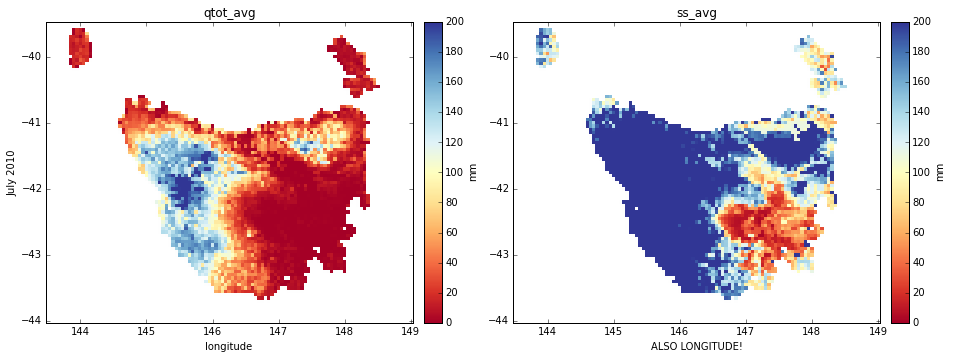

In [17]:
q.spatial(clim=(0,200),xlabel="longitude")

gridview = q.mpl
view = gridview.children[0,1]

view.ax.set_xlabel("ALSO LONGITUDE!")
vis.plt.show()

# display results as timeseries

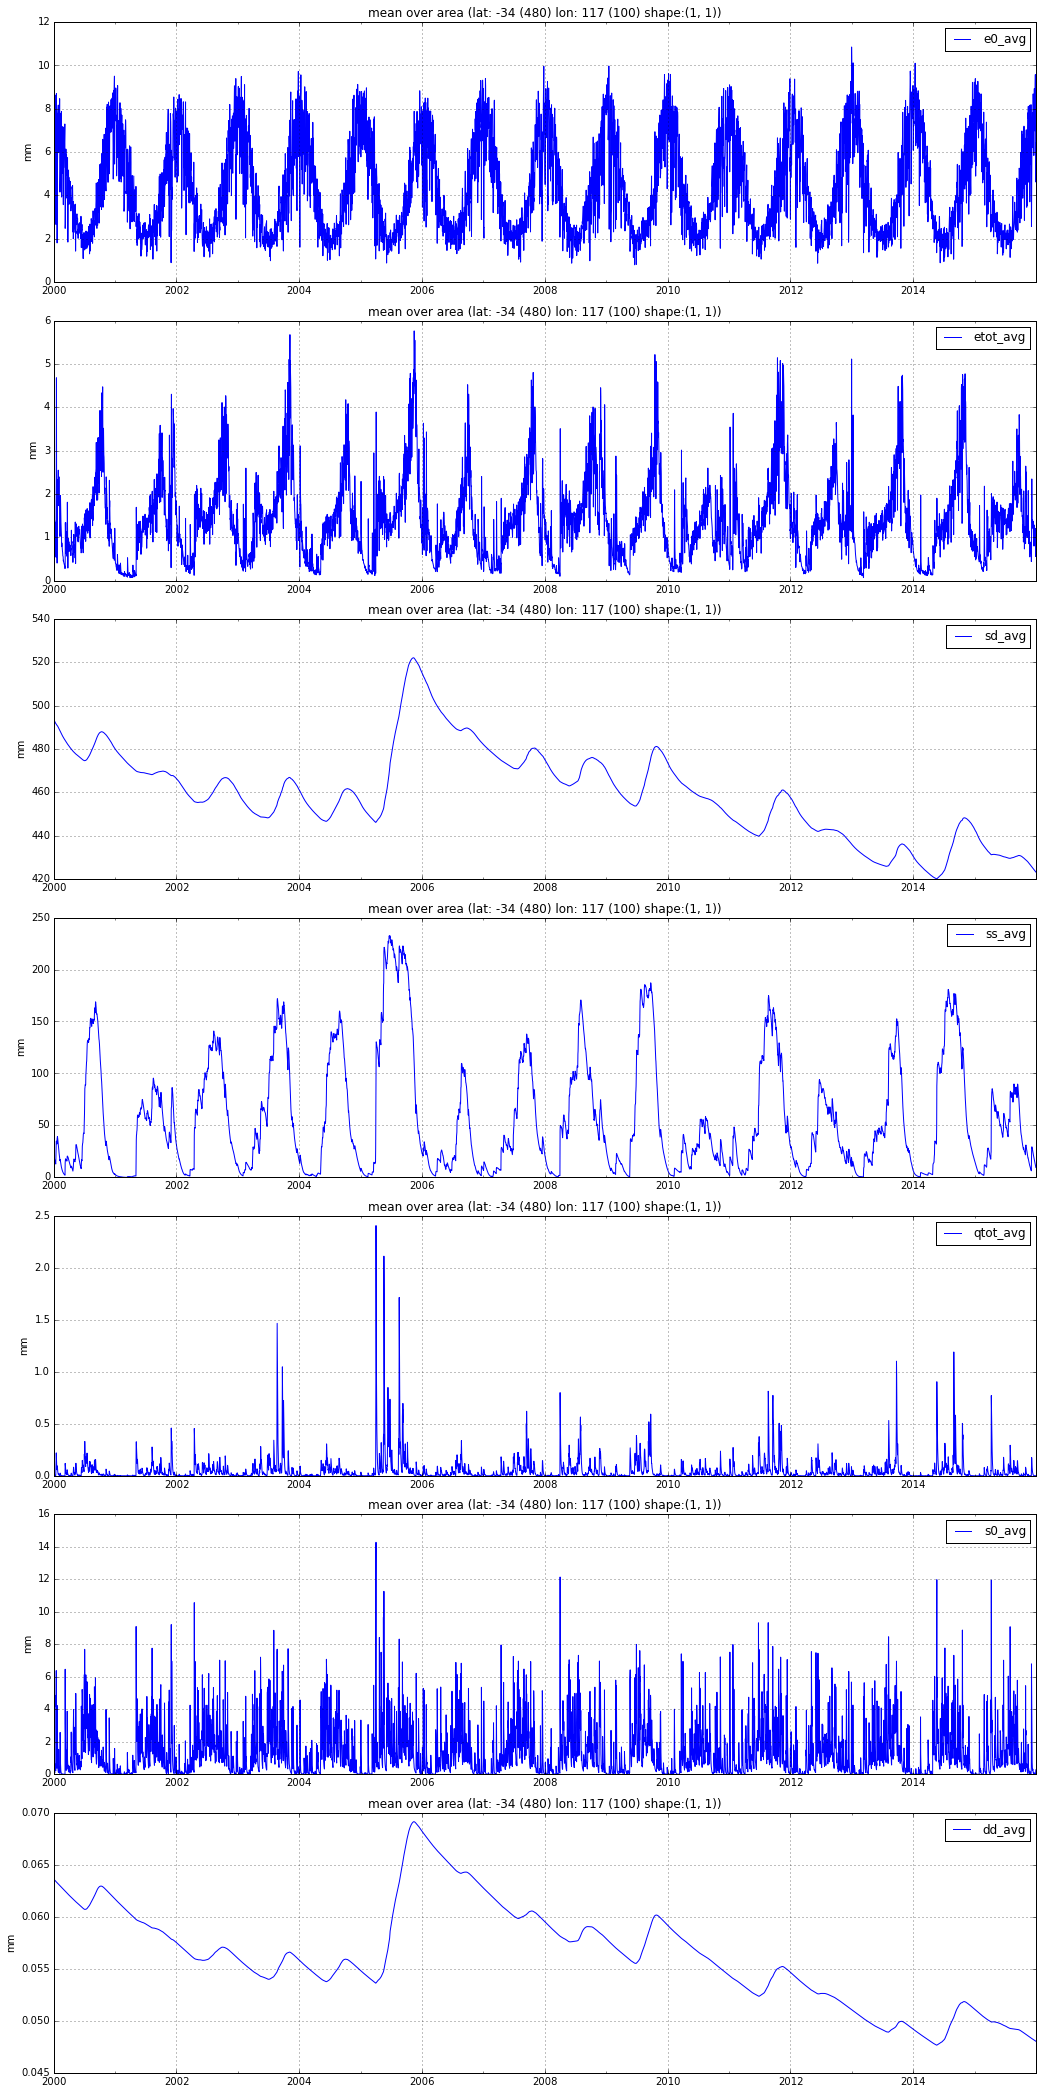

In [18]:
p = '2000 - 2015'
e = vis.extents.from_cell_coords(-34,117)
results[:,p,e].timeseries()

### aggregate over catchment and display as timeseries

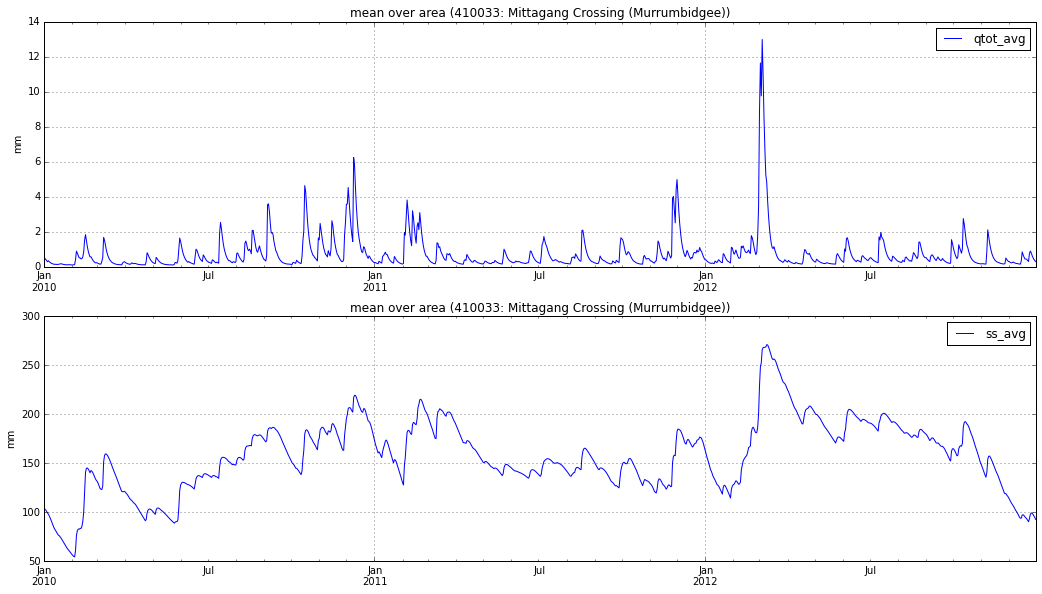

In [19]:
v = results.variables.qtot_avg,results.variables.ss_avg
p = '2010-2012'
e = catchments.by_name.Murrumbidgee_MittagangCrossing()
results[v,p,e].timeseries()

In [20]:
results.variables.qtot_avg.data.shape,results.variables.qtot_avg.agg_data.shape

((1096, 17, 13), (1096,))

## comparing results from different simulations

In [6]:
r1 = res.load_results('/data/cwd_awra_data/awra_test_outputs/Scheduled_v5_awraprod1_bu/')

In [22]:
r2 = res.load_results('/data/cwd_awra_data/awra_test_outputs/Scheduled_v5_awrapreprod/')

In [23]:
r1.variables

OrderedDict([('e0_avg', e0_avg), ('etot_avg', etot_avg), ('sd_avg', sd_avg), ('ss_avg', ss_avg), ('qtot_avg', qtot_avg), ('s0_avg', s0_avg), ('dd_avg', dd_avg)])

In [24]:
r2.variables

OrderedDict([('e0_avg', e0_avg), ('etot_avg', etot_avg), ('sd_avg', sd_avg), ('ss_avg', ss_avg), ('qtot_avg', qtot_avg), ('s0_avg', s0_avg), ('dd_avg', dd_avg)])

In [25]:
v = r1.variables.sd_avg,r2.variables.sd_avg
p = '1 jan 1911'
e = vis.extents.from_cell_coords(-34,117)

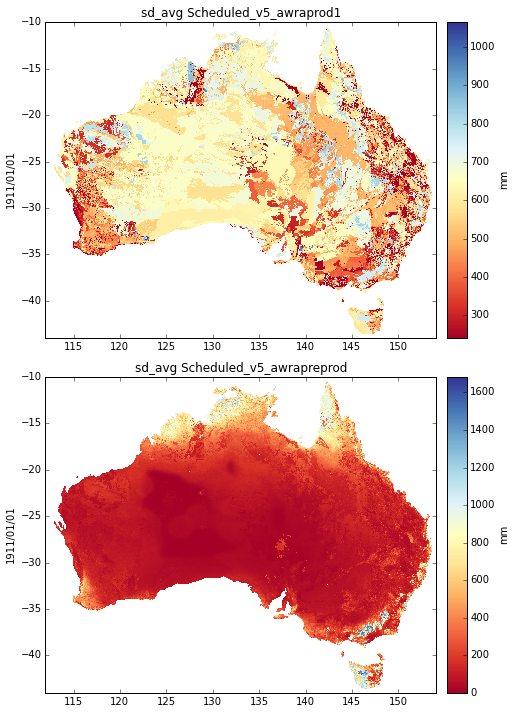

In [ ]:
r1.name = 'Scheduled_v5_awraprod1'
r2.name = 'Scheduled_v5_awrapreprod'
vis.spatial(v, period='1 jan 1911') #,clim=(0,1000))

## visualising climatic inputs

In [3]:
precip = res.load_results('/data/cwd_awra_data/awra_inputs/climate_generated_awrapreprod/rr/')
vis.spatial(precip.variables.rain_day, period='16 may 2016')

In [ ]:
tmax = res.load_results('/data/cwd_awra_data/awra_inputs/climate_generated_awrapreprod/tmax/')
vis.spatial(tmax.variables.temp_max_day, period='16 may 2016')

In [ ]:
tmin = res.load_results('/data/cwd_awra_data/awra_inputs/climate_generated_awrapreprod/tmin/')
vis.spatial(tmin.variables.temp_min_day, period='16 may 2016')

In [ ]:
solar = res.load_results('/data/cwd_awra_data/awra_inputs/climate_generated_awrapreprod/solar/')
vis.spatial(solar.variables.solar_exposure_day, period='16 may 2016')

### more matplotlib settings

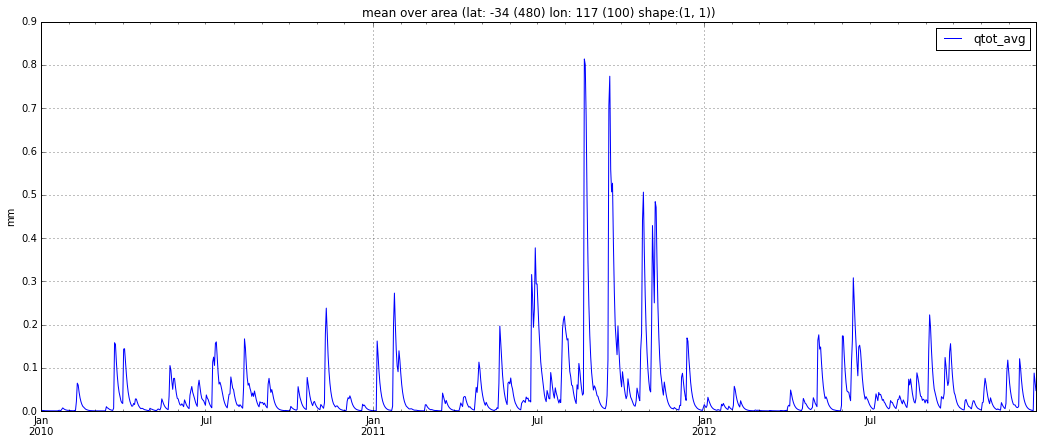

In [7]:
v = r1.variables.qtot_avg
e = vis.extents.from_cell_coords(-34,117)
p = '2010-2012'

q = r1[v,p,e]
q.timeseries()

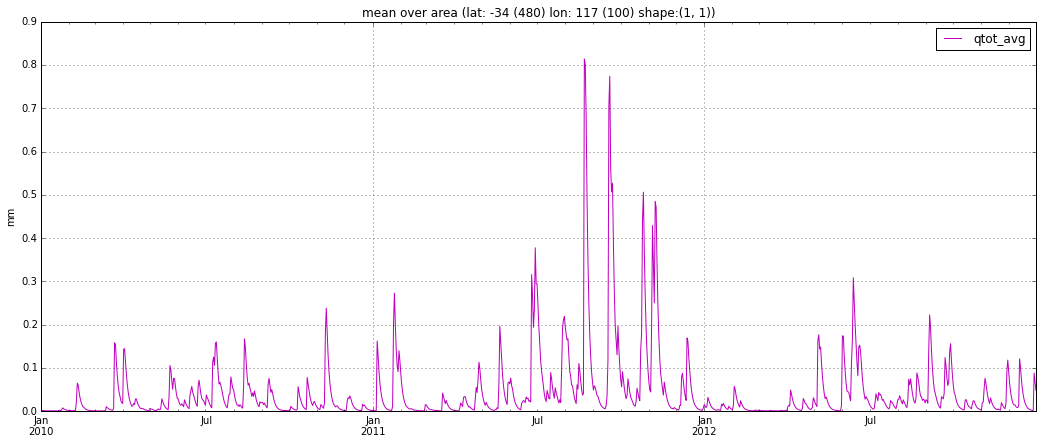

In [8]:
q.timeseries() #ylim=(0,20))
ax = q.mpl.children[0,0].ax
lines = ax.get_lines()
line = lines[0]
line.set_color('m')
leg = ax.get_legend()
legline = leg.get_lines()[0]
legline.set_color('m')